# Обработка исключений

<b>Исключение</b> - это возникновение какой-то ошибки при исполнении программы. Ошибки в питоне бывают следующие:

* Syntax Error
* Out of Memory Error
* Recursion Error
* Indentation Error
* Keyboard Interrupt
* Exceptions

Рассмотрим каждую из них.

## SyntaxError

Эта ошибка возникает, когда в коде программы допущена синтаксическая ошибка, т.е. код просто неправильно написан.

In [ ]:
print( 0 / 0 ))

## RecursionError и OutOfMemoryError

Переполнение стека вызовов функции либо нехватка оперативной памяти для исполнения программы.

In [ ]:
def recursion():
    return recursion()

recursion()

## IndentationError

Ошибка в правильной расстановке отступов в коде. Как мы помним, отступы - это один из основных элементов языка, поэтому соблюдение их крайне важно.

In [ ]:
for i in range(10):
print('Hello world')

## KeyBoardInterrupt

Принудительное прерывание программы с клавиатуры. Запустим бесконечный цикл и прервем его выполнение:

In [ ]:
while True:
    pass

## Exceptions

Исключения. Если код написан синтаксически правильно и без рекурсий, в нём всё равно могут возникать ошибки при исполнении. При этом, поскольку питон - интерпретируемый язык программирования, да еще и с динамической типизацией, большее количество ошибок может возникнуть в runtime и меньшее анализируется до запуска программы.

### TypeError

Эта ошибка возникает, когда мы пытаемся совершить какую-то операцию над теми объектами, над которыми она не определена. Например, попытаемся сложить число и строку:

In [ ]:
a = 5
b = "string"
a + b

### ValueError

Возникает, когда тип подаваемой переменной правильный, но неправильное значение. Например, мы можем преобразовать к числу строку, в которой записано число, но не в которой записан какой-то другой текст:

In [ ]:
s = "123"
int(s)

In [ ]:
s = "qwerty"
int(s)

### ZeroDivisionError

Название говорит само за себя:

In [ ]:
100 / 0

### AttributeError

Возникает тогда, когда мы пытаемся обратиться к тому атрибуту объекта, который не определен.

In [ ]:
class A:
    a = 3
    
a_instance = A()
a.some_attr

### ImportError

Возникает, когда мы пытаемся подключить библиотеку или модуль, которого на нашей системе нет.

In [ ]:
import some_non_existing_module

### LookupError

Возникает, когда пытаемся получить несуществующий элемент в коллекции

In [ ]:
a = [0, 1, 2]
a[15]

In [ ]:
d = {1: 'one', 2: 'two'}
d[15]

### NameError

Когда забыли объявить переменную

In [ ]:
print(some_non_initialied_variable)

На первых порах многие допускают такие ошибки, связанные с областью видимости:

In [ ]:
def some_foo():
    variable = 5
    
variable

## Типы исключений

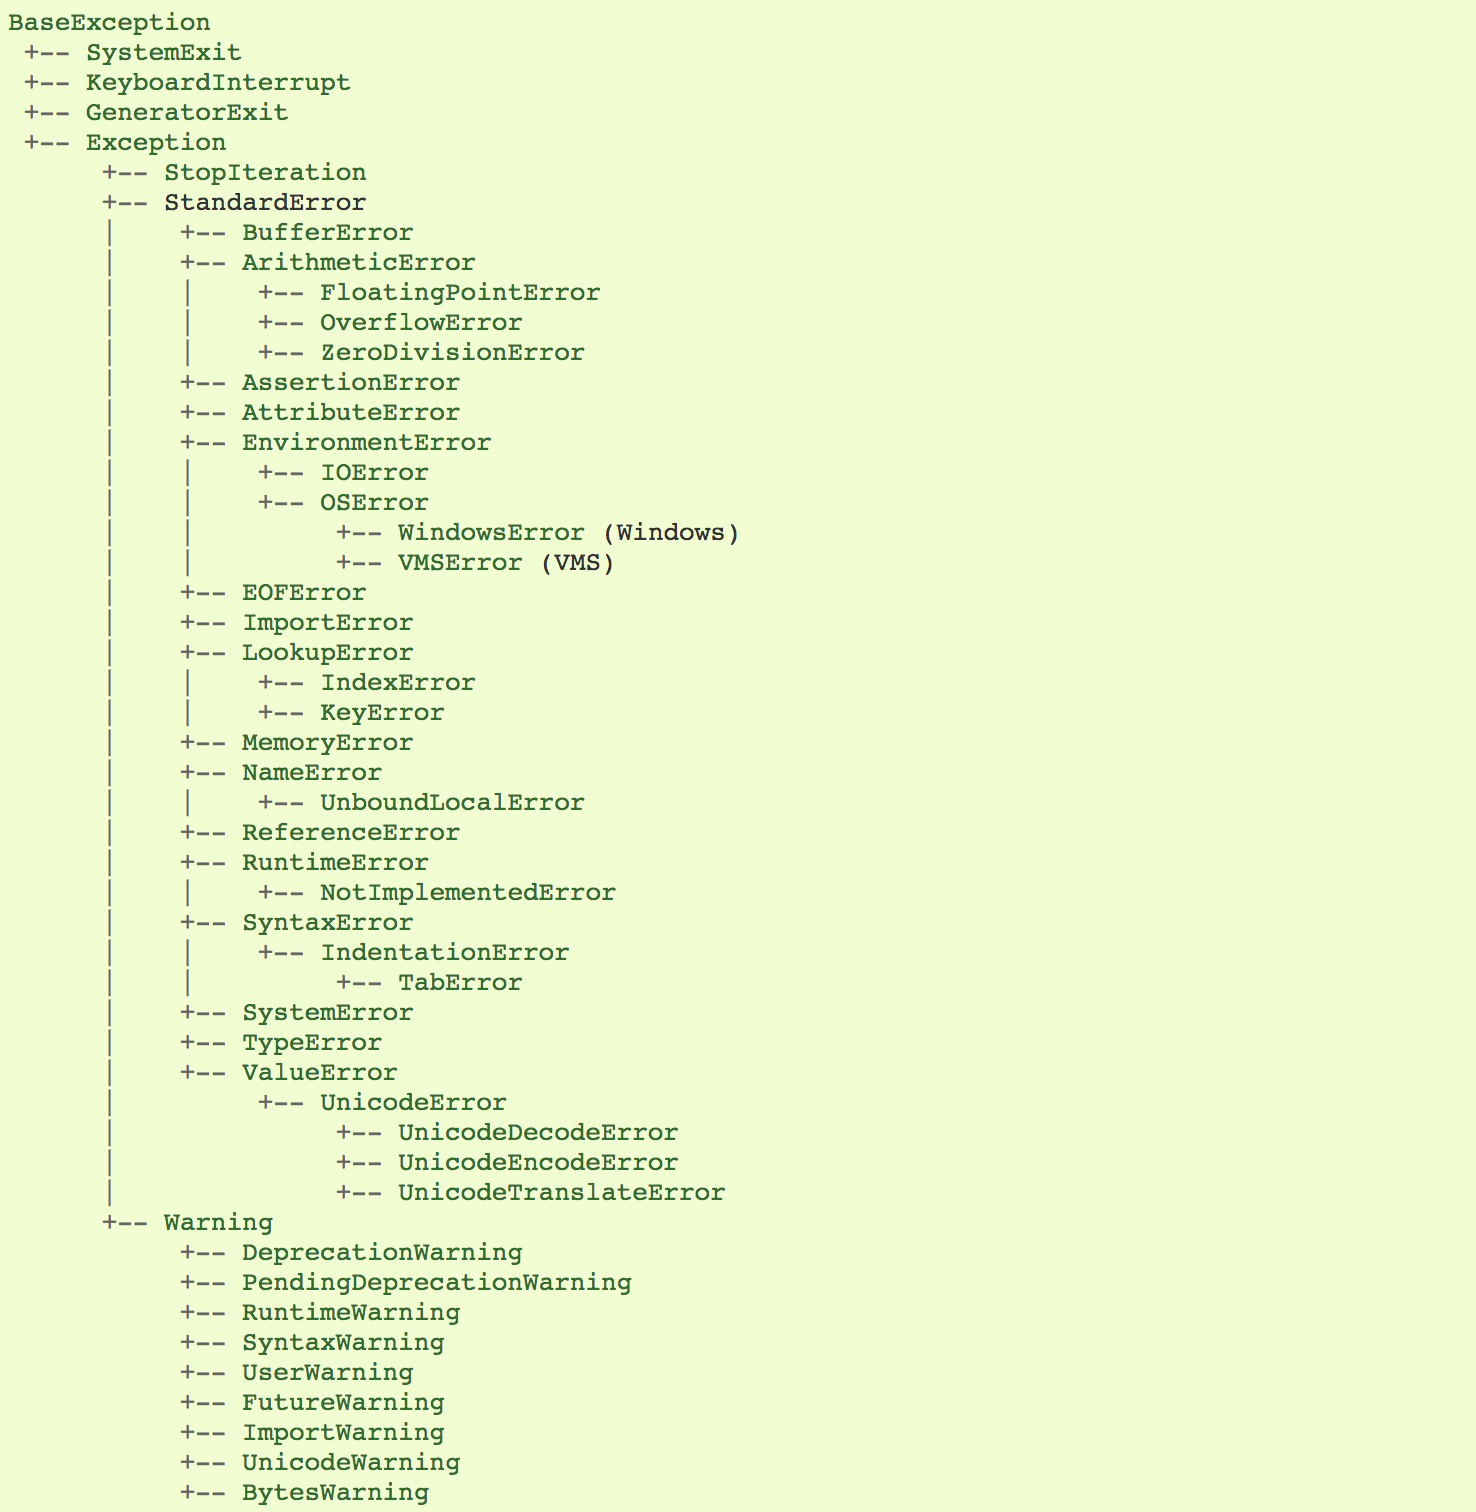

## Работа с исключениями. Вызов исключения

Иногда человеку, который будет использовать наш код, нужно дать понять, что он использует его неправильно. Для этого в неподходящих случаях нужно "выбрасывать" исключение.

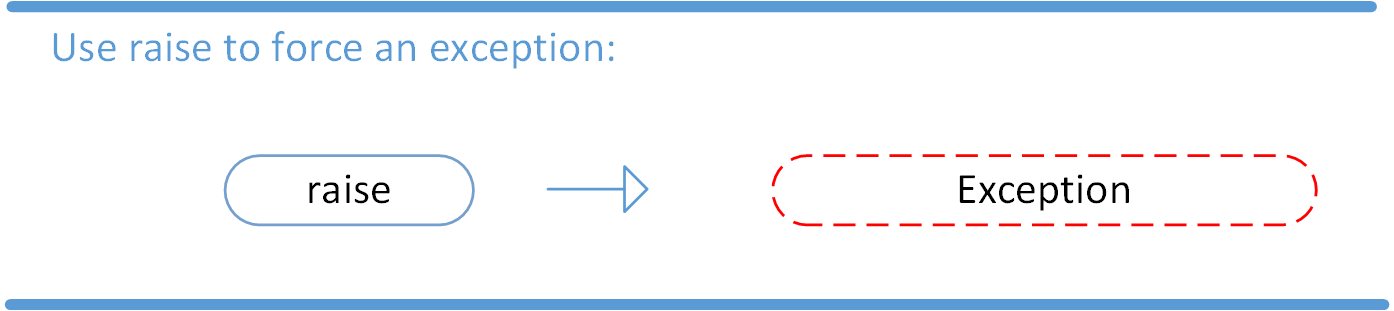

Рассмотрим, как это делается:

In [ ]:
raise ValueError("А тут напишем сообщение об ошибке")

Приведем утрированный пример: пусть у нас есть функция, которая возвращает название ноты по ее номеру или буквенному обозначению. Тогда область принимаемых значений у неё ограничена.

In [ ]:
def get_note_name(note):
    # проверим тип входного значения
    if not isinstance(note, (str, int)):
        raise TypeError("The note value should be string or int")
    # проверим соответствие значения допустимой области значений
    letters = 'CDEFGAHB'
    if note not in list(range(1, 8)) + list(letters) + list(letters.lower()):
        raise ValueError(f"{note} is not a note")
    # если всё правильно:
    answers = ('до', 'ре', 'ми', 'фа', 'соль', 'ля', 'си')
    if isinstance(note, int):
        return answers[note - 1]
    return answers[letters.index(note.upper())]

In [ ]:
get_note_name("a"), get_note_name("A"), get_note_name(6)

In [ ]:
get_note_name(3.0)

In [ ]:
get_note_name(45)

Но вообще для похожих ситуаций в случае проверки полученных значений можно применять AssertionError. Но это в основном используется в тестировании (об этом - на последующих занятиях)

In [ ]:
def get_note_name_assert(note):
    letters = 'CDEFGAHB'
    assert note in list(range(1, 8)) + list(letters) + list(letters.lower()), "note is not correct"
    # если всё правильно:
    answers = ('до', 'ре', 'ми', 'фа', 'соль', 'ля', 'си')
    if isinstance(note, int):
        return answers[note - 1]
    return answers[letters.index(note.upper())]

get_note_name_assert(45)

## Работа с исключениями: обработка исключений

Иногда исключения должны быть частью логики программы. Например, если входное число не подошло для вашего модуля по области значений, необязательно останавливать программу и вываливаться с исключением, достаточно просто вывести сообщение об этой проблеме на экран и предложить пользователю повторить ввод.

Для обработки исключений в питоне используется блок "try - except".

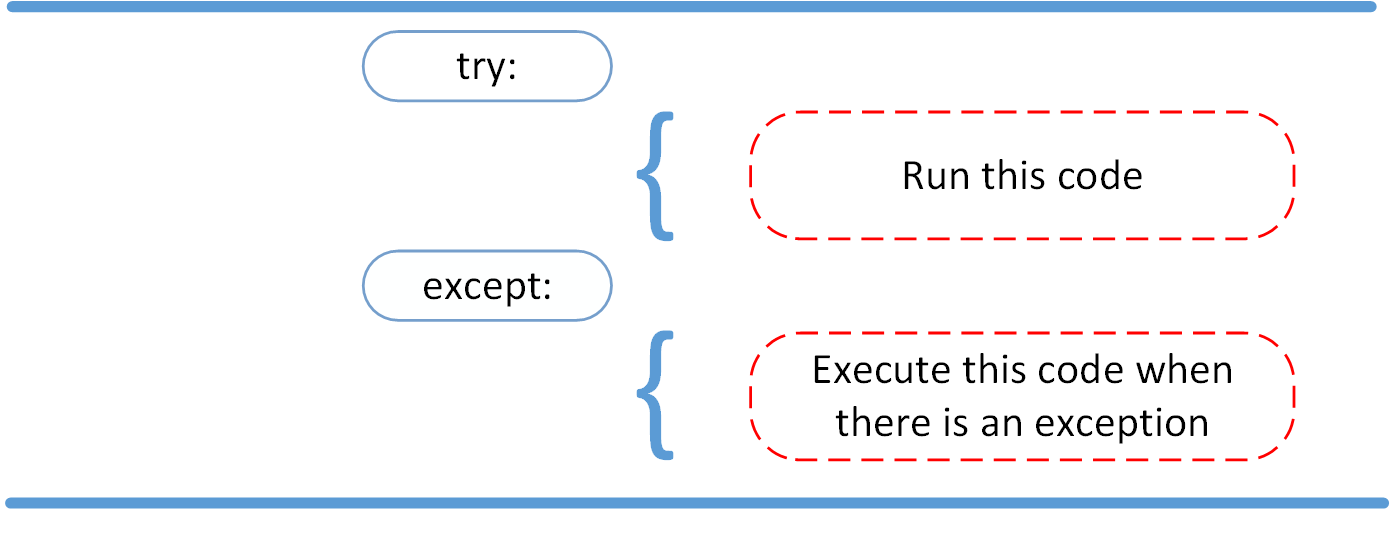

In [ ]:
try:
    get_note_name("abcdef")
except:
    print("Что-то пошло не так")

Но в таком "общем" виде использовать этот блок - плохой стиль, поскольку непонятно, почему именно случилось исключение. Лучше его конкретизировать:

In [ ]:
try:
    get_note_name("abcdef")
except ValueError:
    print("что-то пошло не так")

В этом случае мы обрабатываем только этот тип исключений. Другой обработан не будет:

In [ ]:
try:
    get_note_name(3555.0)
except ValueError:
    print("что-то пошло не так")

Чтобы учесть оба возможных исключения, мы можем добавить либо обработку их класса-предка (см. картинку с иерархией исключений), либо обработку каждого конкретного исключения.

In [ ]:
try:
    get_note_name(100500.0)
except Exception:
    print("что-то пошло не так")

In [ ]:
try:
    get_note_name(100500.0)
except ValueError:
    print("Значение неверное")
except TypeError:
    print("Тип аргумента неверный")

Сам объект исключения содержит в себе несколько полей, которые могут быть полезны при обработке исключений. Мы можем обратиться к нему, используя ключевое слово <code>as</code>, чтобы записать его в переменную и, например, посмотреть его строковое представление.

In [ ]:
try:
    get_note_name(100500)
except ValueError as exc:
    print(exc)

Кстати, полезно иметь в виду, что переменная <code>exc</code> будет определена только внутри блока <code>except</code>:

In [ ]:
exc

И еще мы можем передавать через объект исключения какие-то параметры:

In [ ]:
try:
    raise Exception("description", "arg1", 45, 34.2)
except Exception as exc:
    print(exc.args)

### Блок else

В этом блоке мы можем описать код, который должен выполниться только если в "опасном" блоке кода не произошло исключений.

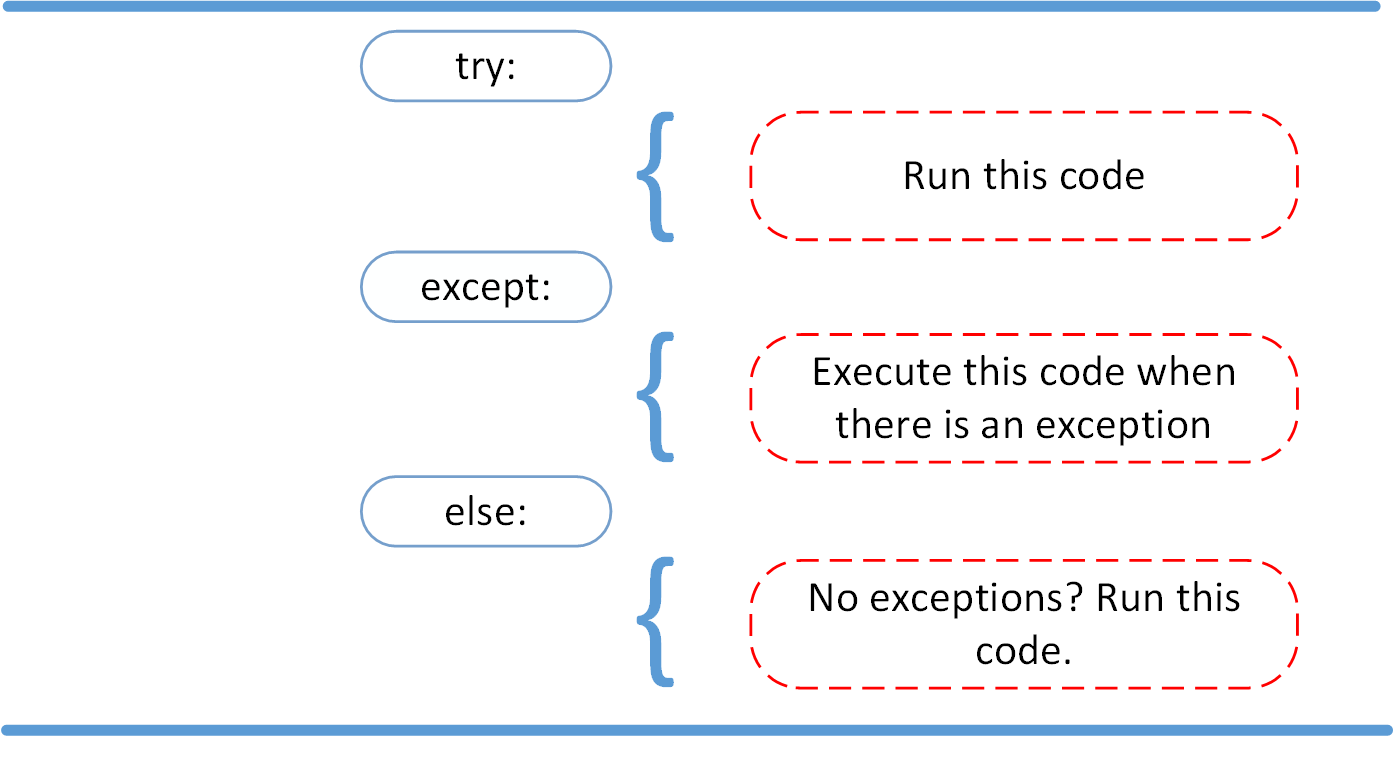

In [ ]:
def play_note(note):
    print("Играю ноту " + note)
    
try:
    note = get_note_name(4)
except ValueError:
    print("Значение неверное")
except TypeError:
    print("Тип аргумента неверный")
else:
    play_note(note)

### Блок finally

В некоторых ситуациях бывает нужно что-то сделать вне зависимости от того, успешно ли исполнился код. Например, закрыть открытый файловый дескриптор. Для этих целей предназначен оператор <code>finally</code>

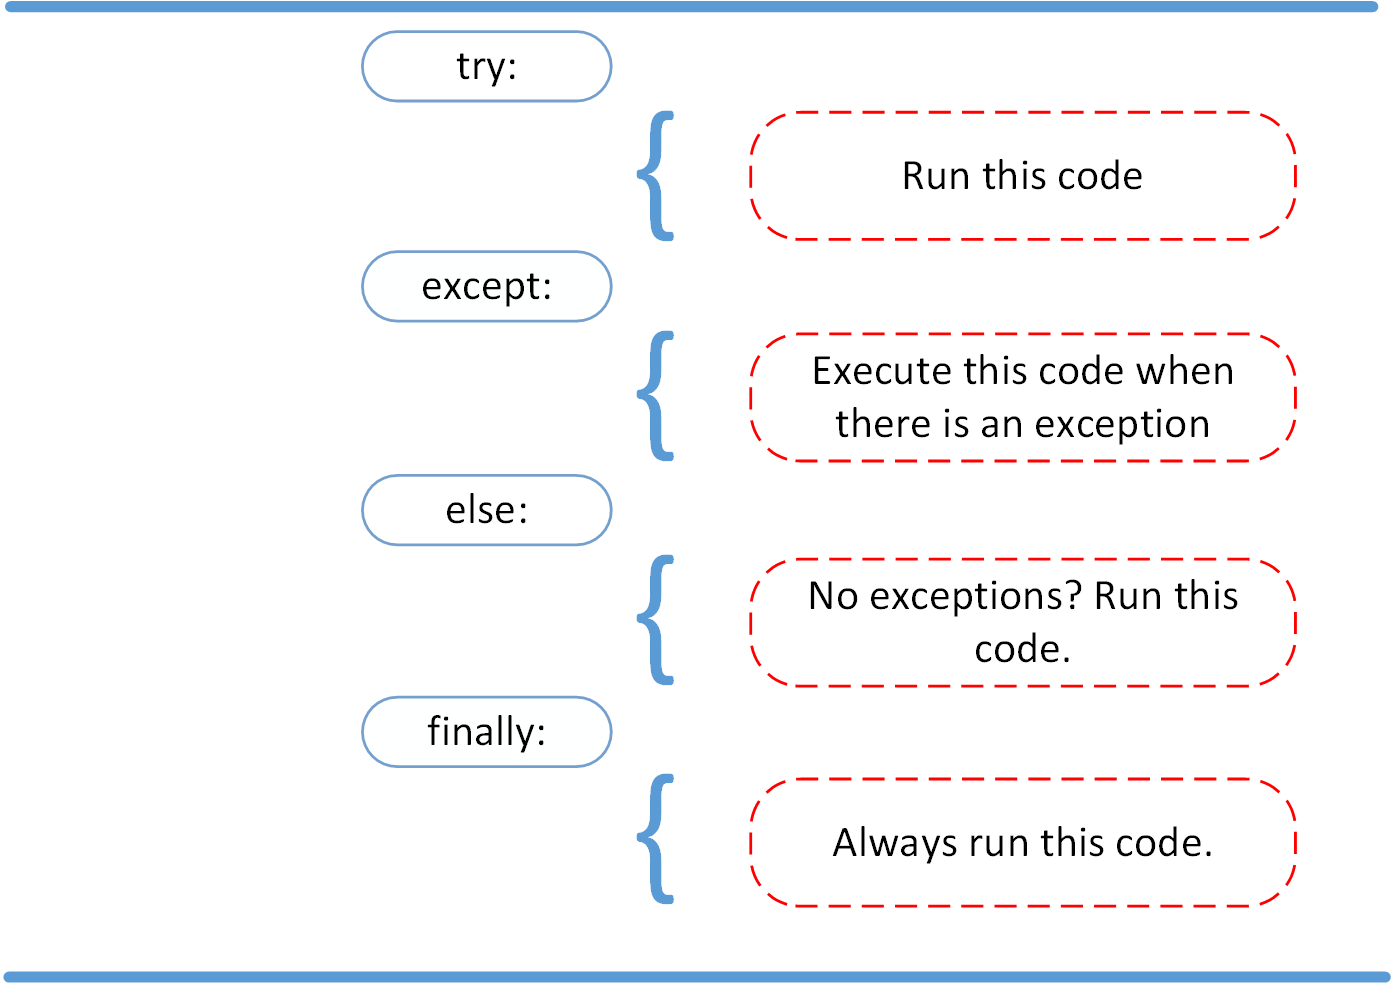

In [ ]:
try:
    note = get_note_name(4)
except ValueError:
    print("Значение неверное")
except TypeError:
    print("Тип аргумента неверный")
else:
    play_note(note)
finally:
    print("Сделал всё, что мог")

In [ ]:
try:
    note = get_note_name(42342)
except ValueError:
    print("Значение неверное")
except TypeError:
    print("Тип аргумента неверный")
else:
    play_note(note)
finally:
    print("Сделал всё, что мог")

In [ ]:
try:
    1 / 0
except ValueError:
    print("Значение неверное")
except TypeError:
    print("Тип аргумента неверный")
else:
    play_note(note)
finally:
    print("Сделал всё, что мог")

## NotImplementedError

Это исключение используется, когда мы в общем случае предполагаем наличие метода у объекта, но в конкретной реализации он не определен. С его помощью можно создавать абстрактные классы:

In [ ]:
class AbstractAnimal:
    species = NotImplemented
    
    def make_a_sound(self):
        raise NotImplementedError("Этот класс - абстрактный, используйте конкретную реализацию")
        

class Cat(AbstractAnimal):
    species = "Кошка"
    
    def make_a_sound(self):
        print("Мяяяяяяяу")
    
    
class Dog(AbstractAnimal):
    species = "Собака"
    
    def make_a_sound(self):
        print("Гав") 

In [ ]:
AbstractAnimal().species

In [ ]:
AbstractAnimal().make_a_sound()

In [ ]:
Cat().make_a_sound()
Dog().make_a_sound()

## Custom Exceptions

Часто при создании крупных проектов и библиотек хочется конкретизировать ошибки, чтобы быстрее с ними справляться или обрабатывать только конкретные случаи ошибок. Для этого можно создать классы новых исключений, отнаследовавшись от базового или любого другого исключения.

In [ ]:
class MyIndexError(IndexError):
    def __init__(self,*args,**kwargs):
        IndexError.__init__(self,*args,**kwargs)

При этом наследование этого класса будет учитываться при поимке исключения:

In [ ]:
try:
    raise IndexError("выбрасываем IndexError")
except MyIndexError:
    print("поймали")

In [ ]:
try:
    raise MyIndexError("выбрасываем IndexError")
except IndexError:
    print("поймали")

Или, например, мы не хотим показывать в сообщении об ошибке все параметры, с которыми было выброшено исключение, но хотим их записать в лог. Тогда мы можем переопределить конструктор исключения:

In [ ]:
class MyLoggingError(Exception):
    def __init__(self, message, *args):
        super(MyLoggingError, self).__init__("Вызываем конструктор базового исключения, но без входных аргументов")
        with open("exceptions_log.txt", "a+") as log:
            log.write(message + ":" + str(args))

In [ ]:
for i in range(10):
    try:
        raise MyLoggingError("Сообщение об ошибке. Аргументы", i, "arg%d" % i)
    except MyLoggingError:
        pass    

In [ ]:
with open("exceptions_log.txt", "r") as f:
    print(f.read())